<a href="https://colab.research.google.com/github/aditya8075/Plant-Disease-Prediction/blob/main/Plant_decease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
!ls "/content/drive/My Drive"

 50_Startups.csv
 A01X1RH33ZZ0_CertA4_20220612_073353.pdf
 A09GKC5VRHUD_CertA4_20220614_124705.pdf
'A0GP03XUU24N_CertA4_20220505_115637 (1) (1).pdf'
 A0GP03XUU24N_CertA4_20220505_115637.pdf
 A0JPG9QGETSS_CertA4_20220526_131732.pdf
 A0JY8M4UFZFT_CertA4_20220622_072851.pdf
 A0MF4ZN6K42D_CertA4_20220622_085437.pdf
 A0N8DY6UXLBQ_CertA4_20220507_052407.pdf
 A0RK607U4TCF_CertA4_20220216_082037.pdf
'A0T5FJPLWFNU_CertA4_20220513_105831 (1).pdf'
 A0T5FJPLWFNU_CertA4_20220513_105831.pdf
 A0TMQYNV82K3_CertA4_20220217_134835.pdf
 A0VA371WTV9Y_CertA4_20220329_140340.pdf
 A0WP3ZRYJSX6_CertA4_20220514_131735.pdf
 A0XRP3X6K4D8_CertA4_20220629_104116.pdf
 A0Y1FCCPLZYZ_CertA4_20220629_102056.pdf
 A0Y3HLZ776KX_CertA4_20220217_082614.pdf
 A0Z9LUZ9F909_CertA4_20220617_112508.pdf
 abcnews-date-text.csv
'Aditya Tadas Almax 20 Admission Documents'
 Advanced_SQL.sql
'all docs_pdf.pdf'
 bank-full.csv
'Bank Marketing effectiveness prediction - Aditya Tadas Capstone project'
 bike_count_prediction.csv
'Bike shari

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from sklearn.preprocessing import label_binarize ,LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array , array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation , Flatten , Dropout , Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical



In [31]:

'/content/drive/MyDrive/plant deasece project/Plant_images_pianalytix/Potato___Early_blight'

'/content/drive/MyDrive/plant deasece project/Plant_images_pianalytix/Potato___Early_blight'

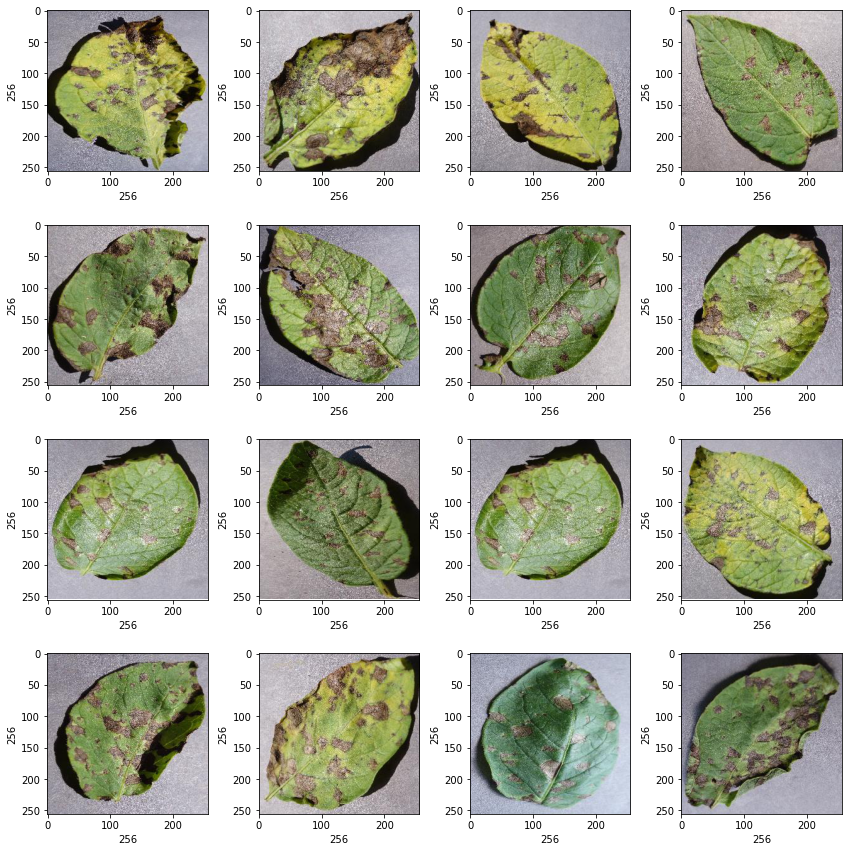

In [32]:
#plotting 12 images to cheak datset
plt.figure(figsize=(12,12))
path ='/content/drive/MyDrive/plant deasece project/Plant_images_pianalytix/Potato___Early_blight'
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize = 10 )#width of image
  plt.ylabel(rand_img.shape[0],fontsize = 10 )#height of image

     

In [33]:
#converting images to array
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None :
      image = cv2.resize(image,(256,256))
      #image = cv2.cvtcolor(image)
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f'Error : {e}')
    return None


In [34]:
dir = '/content/drive/MyDrive/plant deasece project/Plant_images_pianalytix'
root_dir = listdir(dir)
image_list , label_list = [],[]
all_labels = ['corn-common_rust','Potato-Early_bright','Tomato-Bacterial_spot']
binary_labels=[0,1,2]
temp =-1

#reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f'{dir}/{directory}')
  temp += 1
  for files in plant_image_list:
    image_path=f'{dir}/{directory}/{files}'
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])


In [35]:
#visualize the number of classes count
label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()


0    300
1    300
2    300
dtype: int64

In [36]:
image_list[0].shape

(256, 256, 3)

In [37]:
label_list=np.array(label_list)
label_list.shape

(900,)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(image_list,label_list,test_size=0.2,random_state=10)

In [39]:
x_train=np.array(x_train,dtype=np.float16)/225.0
x_test=np.array(x_test,dtype=np.float16) / 225.0
x_train_= x_train.reshape(-1,256,256,3)
x_test=x_test.reshape(-1,256,256,3)


In [40]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [41]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 112896)            0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [42]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(0.0001),metrics=['accuracy'])

In [43]:
x_train, x_val ,y_train, y_val = train_test_split(x_train,y_train,test_size=0.2)


In [44]:
#Trainig the model
epochs=50
batch_size=128
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/50
5/5 [==============================] - 2s 260ms/step - loss: 0.9372 - accuracy: 0.5642 - val_loss: 0.6780 - val_accuracy: 0.6944
Epoch 2/50
5/5 [==============================] - 1s 187ms/step - loss: 0.5333 - accuracy: 0.7760 - val_loss: 0.4209 - val_accuracy: 0.8889
Epoch 3/50
5/5 [==============================] - 1s 184ms/step - loss: 0.3600 - accuracy: 0.9358 - val_loss: 0.3093 - val_accuracy: 0.9444
Epoch 4/50
5/5 [==============================] - 1s 184ms/step - loss: 0.2586 - accuracy: 0.9497 - val_loss: 0.2462 - val_accuracy: 0.9722
Epoch 5/50
5/5 [==============================] - 1s 186ms/step - loss: 0.1936 - accuracy: 0.9653 - val_loss: 0.1782 - val_accuracy: 0.9583
Epoch 6/50
5/5 [==============================] - 1s 185ms/step - loss: 0.1514 - accuracy: 0.9792 - val_loss: 0.1503 - val_accuracy: 0.9514
Epoch 7/50
5/5 [==============================] - 1s 187ms/step - loss: 0.1251 - accuracy: 0.9688 - val_loss: 0.1217 - val_accuracy: 0.9792
Epoch 8/50
5/5 [====

In [46]:
model.save('content/drive/My Drive/plant_desease.h6')
#serialize model to json
json_model=model.to_json()
#save model architecture to Json file
with open('/content/drive/My Drive/plant_model.json','w') as json_file:
  json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/plant_model_weights.h6')

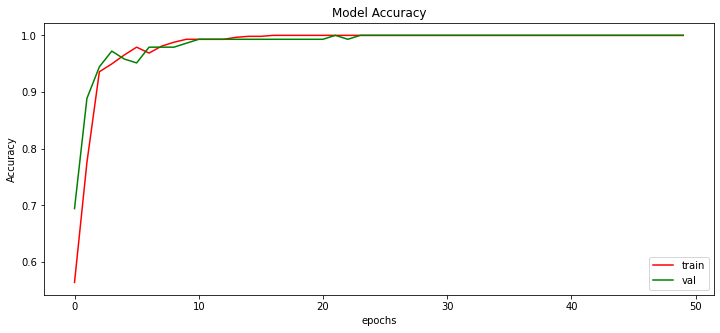

In [47]:
#plot the training history
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='g')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.show()

Next we will plot the accuracy of the model for the training history

In [48]:
print('[INFO] Calculating model accuracy')
scores=model.evaluate(x_test,y_test)
print(f'Test Accuracy : {scores[1]*100}')

[INFO] Calculating model accuracy
6/6 [==============================] - 0s 47ms/step - loss: 0.0406 - accuracy: 0.9889
Test Accuracy : 98.88888597488403


In [49]:
y_pred=model.predict(x_test)

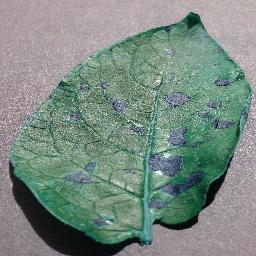

In [55]:
#plotting image to compare
img=array_to_img(x_test[40])
img

In [56]:
print('originally:', all_labels[np.argmax(y_test[40])])
print('Predicted:', all_labels[np.argmax(y_pred[40])])

originally: corn-common_rust
Predicted: corn-common_rust


In [57]:
print('originally:', all_labels[np.argmax(y_test[15])])
print('Predicted:', all_labels[np.argmax(y_pred[15])])

originally: Tomato-Bacterial_spot
Predicted: Tomato-Bacterial_spot
